In [1]:
#importando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.DataFrame({
    "pH":[3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 6.0, 2.0, 7.5,
          4.5, 5.0, 2.8, 8.0],
    "Concentração":['Concentrada', 'Diluída', 'Concentrada',
                    'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 
                    'Diluída', 'Concentrada', 'Diluída', 'Concentrada',
                    'Diluída', 'Concentrada', 'Diluída'],
    "Cheiro":['Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro',
              'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro',
              'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro',
              'Com Cheiro', 'Sem Cheiro'],
    "Classe":['Ácida','Básica','Ácida','Básica',
              'Ácida','Básica','Ácida','Básica',
              'Ácida','Básica','Ácida','Básica',
              'Ácida','Básica']
})

In [4]:
data['Concentração']=data['Concentração'].map({'Concentrada':0,'Diluída':1})
data['Cheiro']=data['Cheiro'].map({'Com Cheiro':2,'Sem Cheiro':3})

In [5]:
# Separando a base de dados em X e Y
x=data[['pH','Concentração','Cheiro']]
y=data['Classe']

In [6]:
# Dividindo a base de dados em treino e teste
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,
                                                random_state=42)

In [8]:
# Criação do medelo de Machine Learning
modelo= SVC(kernel='linear')
modelo.fit(x_train,y_train)

SVC(kernel='linear')

In [9]:
# Fazendo predições
yprev = modelo.predict(x_test)

In [10]:
yprev

array(['Básica', 'Básica', 'Ácida', 'Ácida', 'Básica'], dtype=object)

In [11]:
x_test

,pH,Concentração,Cheiro
9,7.5,1,3
11,5.0,1,3
0,3.0,0,2
12,2.8,0,2
5,6.5,1,3


In [12]:
data.head(20)

,pH,Concentração,Cheiro,Classe
0,3.0,0,2,Ácida
1,5.5,1,3,Básica
2,2.5,0,2,Ácida
3,7.0,1,3,Básica
4,4.0,0,2,Ácida
5,6.5,1,3,Básica
6,3.5,0,2,Ácida
7,6.0,1,3,Básica
8,2.0,0,2,Ácida
9,7.5,1,3,Básica


In [13]:
# Calculo das métricas do algoritimo de Machine Learning
# Acurácia = VP+VN / Total(VP + FP+FN+VN)
acc = accuracy_score(yprev,y_test)
acc

1.0

In [14]:
# Classification report
cr=classification_report(yprev,y_test)
print(cr)

              precision    recall  f1-score   support

      Básica       1.00      1.00      1.00         3
       Ácida       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [15]:
# Matriz de confusão
cm = confusion_matrix(yprev,y_test)
print(cm)

[[3 0]
 [0 2]]


Text(50.722222222222214, 0.5, 'Real')

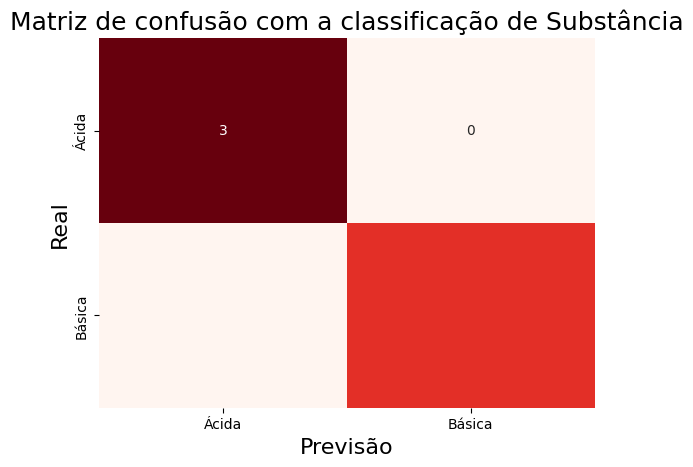

In [16]:
# Visualizando a matriz de confusão de forma gráfica
sns.heatmap(cm,annot=True,cmap='Reds',cbar=False,
            xticklabels=['Ácida','Básica'],
            yticklabels=['Ácida','Básica']
)
plt.title('Matriz de confusão com a classificação de Substância',fontsize=18)
plt.xlabel('Previsão',fontsize=16)
plt.ylabel('Real',fontsize=16)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

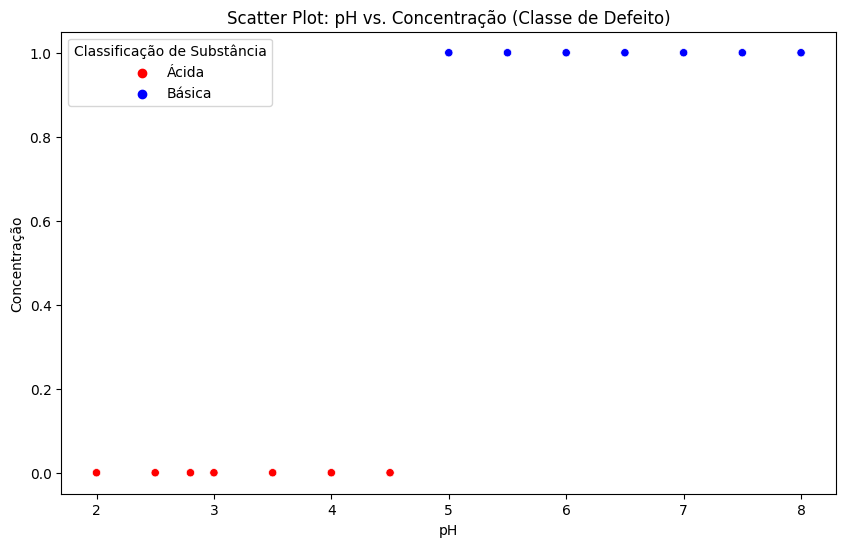

In [17]:
# Mapeando as cores com base na classe
palette = {"Ácida": "red", "Básica": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH', y='Concentração', hue='Classe', data=data, palette= palette)
 
# Personalizando o gráfico
plt.title('Scatter Plot: pH vs. Concentração (Classe de Defeito)')
plt.xlabel('pH')
plt.ylabel('Concentração')
 
# Mostrando o gráfico
plt.legend(title='Classificação de Substância')
plt.show()